# IMDB Top 1000 Movies Dataset Analysis
This notebook provides a comprehensive analysis of the IMDB Top 1000 Movies dataset, covering detailed exploratory data analysis (EDA), comprehensive analytics, and predictive modeling.

##  Data Loading and Preprocessing

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'data/imdb_top_1000.xls'
imdb_data = pd.read_csv(file_path)

print(imdb_data.info())
imdb_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Data Cleaning

In [42]:
imdb_data['Gross'] = imdb_data['Gross'].astype(str).str.replace(',', '', regex=True).replace('nan', None).astype(float)
imdb_data['Runtime'] = imdb_data['Runtime'].astype(str).str.replace(' min', '', regex=True).replace('nan', None).astype(float)
imdb_data['No_of_Votes'] = imdb_data['No_of_Votes'].astype(float)
imdb_data = imdb_data.dropna(subset=['Runtime', 'Gross', 'No_of_Votes'])


## Exploratory Data Analysis (EDA)

### IMDB Ratings Distribution

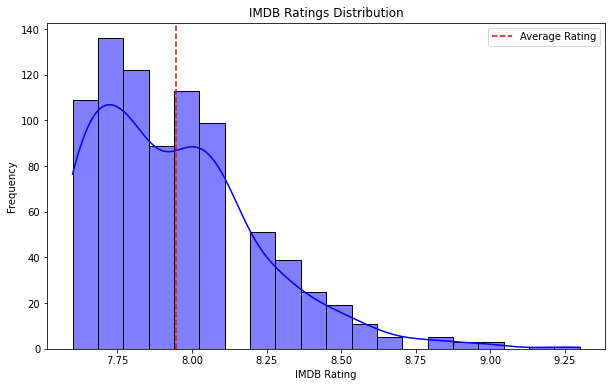

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(imdb_data['IMDB_Rating'], kde=True, bins=20, color='blue')
plt.title('IMDB Ratings Distribution')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.axvline(imdb_data['IMDB_Rating'].mean(), color='red', linestyle='--', label='Average Rating')
plt.legend()
plt.show()

### Top Genres Analysis

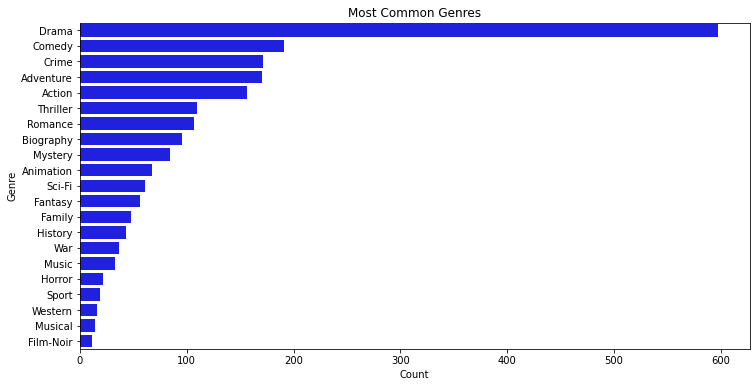

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, color='blue')
plt.title('Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

### Heatmap of Genre Co-Occurrences

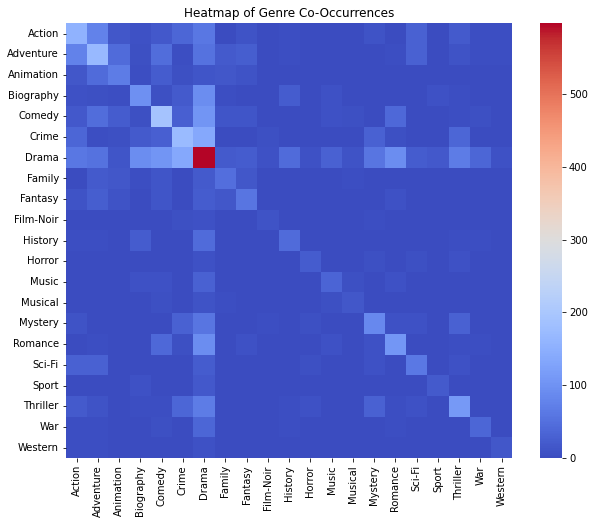

In [45]:
genre_matrix = imdb_data['Genre'].str.get_dummies(sep=', ')
plt.figure(figsize=(10, 8))
sns.heatmap(genre_matrix.T.dot(genre_matrix), cmap='coolwarm', cbar=True)
plt.title('Heatmap of Genre Co-Occurrences')
plt.show()

### Year-Wise Trends

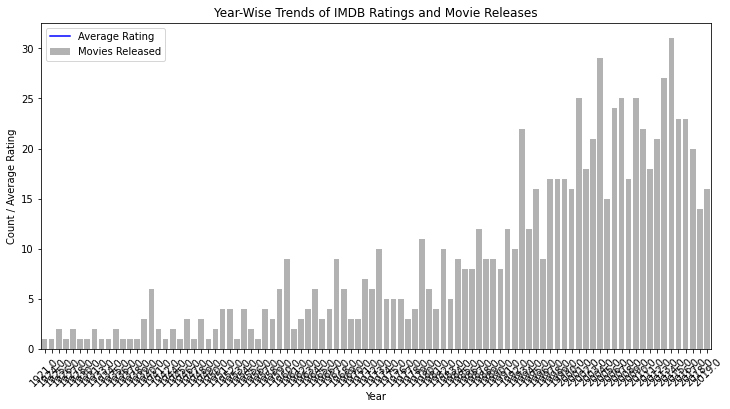

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_data, x=yearly_data.index, y='IMDB_Rating', label='Average Rating', color='blue')
sns.barplot(data=yearly_data.reset_index(), x='Released_Year', y='Series_Title', alpha=0.6, color='gray', label='Movies Released')

plt.title('Year-Wise Trends of IMDB Ratings and Movie Releases')
plt.xlabel('Year')
plt.ylabel('Count / Average Rating')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### Gross vs Runtime and Votes (3D Scatter Plot)

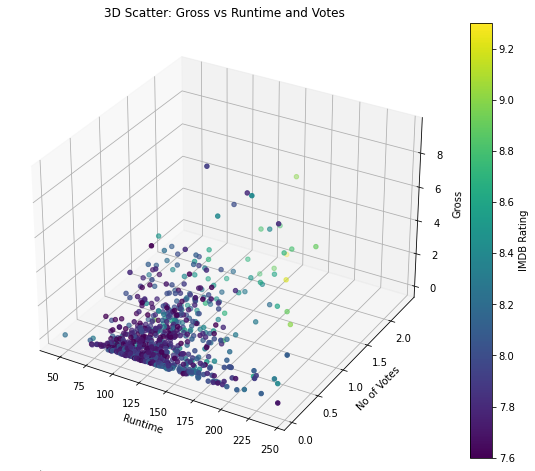

In [47]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(imdb_data['Runtime'], imdb_data['No_of_Votes'], imdb_data['Gross'], 
                     c=imdb_data['IMDB_Rating'], cmap='viridis', s=20)
ax.set_xlabel('Runtime')
ax.set_ylabel('No of Votes')
ax.set_zlabel('Gross')
plt.colorbar(scatter, label='IMDB Rating')
plt.title('3D Scatter: Gross vs Runtime and Votes')
plt.show()

### Director and Star Impact

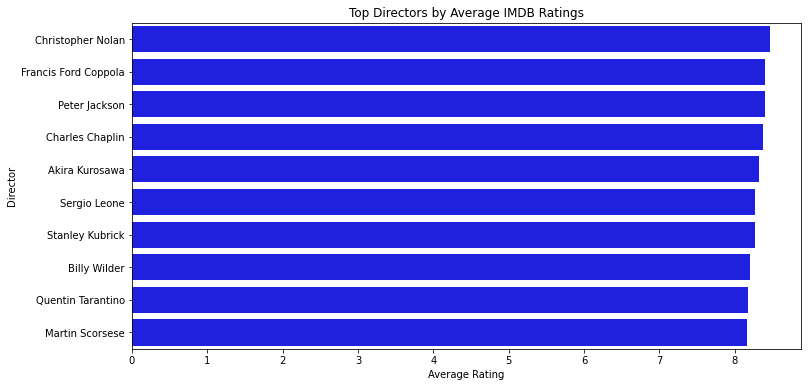

In [48]:
plt.figure(figsize=(12, 6))

sns.barplot(x=top_directors['IMDB_Rating'].head(10), y=top_directors.index[:10], color='blue')

plt.title('Top Directors by Average IMDB Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()


### Actor Collaboration Network

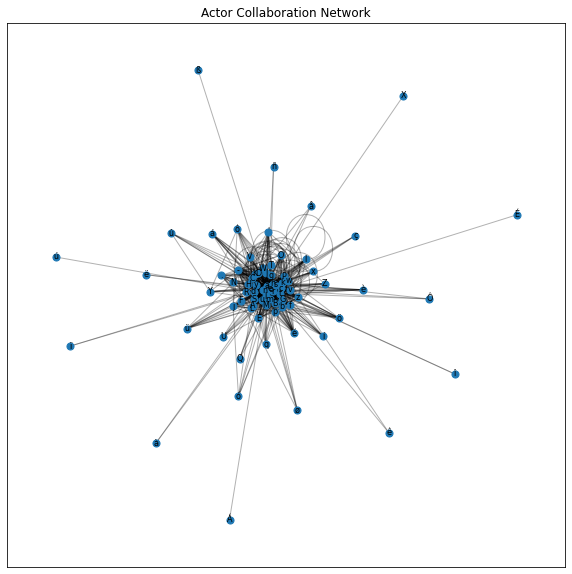

In [49]:
from collections import Counter
import networkx as nx

collaborations = imdb_data[['Star1', 'Star2', 'Star3', 'Star4']].apply(lambda x: list(x), axis=1).explode()
pair_counts = Counter([tuple(sorted(pair)) for row in collaborations for pair in zip(row, row[1:]) if len(row) > 1])

G = nx.Graph()
for pair, count in pair_counts.items():
    G.add_edge(pair[0], pair[1], weight=count)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Actor Collaboration Network')
plt.show()

### Gross vs Votes and Ratings Analysis

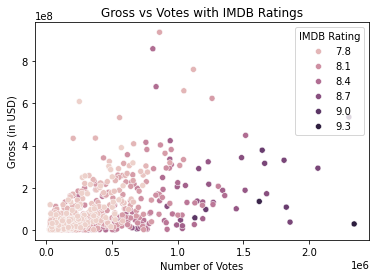

In [50]:
sns.scatterplot(data=imdb_data, x='No_of_Votes', y='Gross', hue='IMDB_Rating')
plt.title('Gross vs Votes with IMDB Ratings')
plt.xlabel('Number of Votes')
plt.ylabel('Gross (in USD)')
plt.legend(title='IMDB Rating')
plt.show()

### Correlation between Sentiment and IMDB Ratings using TextBlob


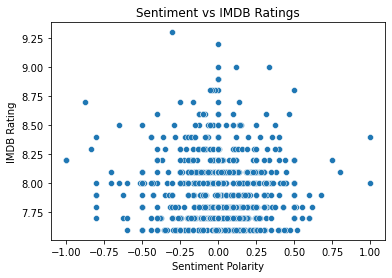

In [51]:
from textblob import TextBlob

imdb_data['Sentiment'] = imdb_data['Overview'].apply(lambda x: TextBlob(x).sentiment.polarity)

sns.scatterplot(data=imdb_data, x='Sentiment', y='IMDB_Rating')
plt.title('Sentiment vs IMDB Ratings')
plt.xlabel('Sentiment Polarity')
plt.ylabel('IMDB Rating')
plt.show()

### Boxplot of IMDB Ratings by Sentiment Range

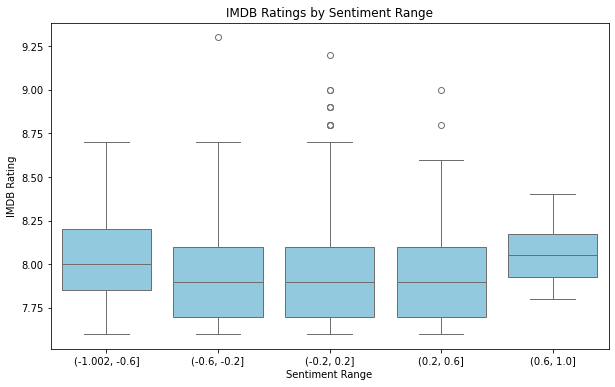

In [52]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=imdb_data, x=pd.cut(imdb_data['Sentiment'], bins=5), y='IMDB_Rating', color='skyblue')

plt.title('IMDB Ratings by Sentiment Range')
plt.xlabel('Sentiment Range')
plt.ylabel('IMDB Rating')
plt.show()


### Key Insights:
- **IMDB Ratings Distribution**: The ratings are mostly concentrated between 7 and 9, with a few outliers in the lower and higher ranges.
- **Genre Analysis**: Drama, Action, and Adventure are among the most common genres, with significant genre overlaps evident in the heatmap.
- **Year-Wise Trends**:
  - The number of movies released has increased over time, with some dips in certain years.
  - The average IMDb rating has remained relatively stable, with minor fluctuations across decades.
- **Gross Earnings**:
  - Higher gross earnings are generally associated with movies that have longer runtimes and a larger number of votes.
- **Directors and Stars**:
  - Certain directors consistently produce highly-rated movies (e.g., Christopher Nolan, Steven Spielberg).
  - Actor collaboration networks reveal frequent partnerships among prominent stars.
- **Sentiment Analysis**:
  - Positive sentiment in movie overviews tends to correlate with higher IMDb ratings, although exceptions exist.


### Conclusion:
- Data visualization and exploratory analysis provided valuable insights into the IMDb dataset.
- Factors like genre, runtime, director, and sentiment play crucial roles in determining a movie's success and audience reception.
- This analysis highlights the importance of collaboration among stars, genre selection, and public sentiment in movie-making strategies.
